In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Upload data

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving imputed features_final.csv to imputed features_final (1).csv
Saving Optimal target.csv to Optimal target (1).csv
Saving Real target_no92.csv to Real target_no92 (1).csv
Saving survival.csv to survival (1).csv


In [5]:
import io
feature = pd.read_csv(io.BytesIO(uploaded['imputed features_final.csv'])) 
optimal_target = pd.read_csv(io.BytesIO(uploaded['Optimal target.csv'])) 
real_target = pd.read_csv(io.BytesIO(uploaded['Real target_no92.csv'])) 
survival = pd.read_csv(io.BytesIO(uploaded['survival.csv'])) 

##Classification (Early / Medium / Late)

In [6]:
optimal_real_target = pd.merge(optimal_target, real_target, on = 'SubjectID')
optimal_real_target = optimal_real_target.drop(columns=['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y'] )
optimal_real_target1 = optimal_real_target.copy()
optimal_real_target1 = optimal_real_target1[(optimal_real_target1['status_opt']== 1) & (optimal_real_target1['status_real']==1 )]
optimal_real_target1['real_minus_opt_time'] = optimal_real_target1['time_real'] - optimal_real_target1['time_opt']
optimal_real_target1

,SubjectID,time_opt,status_opt,time_real,status_real,real_minus_opt_time
2,533,287,1,287,1,0
12,6483,98,1,98,1,0
13,6786,272,1,272,1,0
14,7036,124,1,124,1,0
32,12808,244,1,214,1,-30
...,...,...,...,...,...,...
2780,988743,309,1,337,1,28
2795,991582,280,1,280,1,0
2809,994895,191,1,191,1,0
2811,995893,149,1,175,1,26


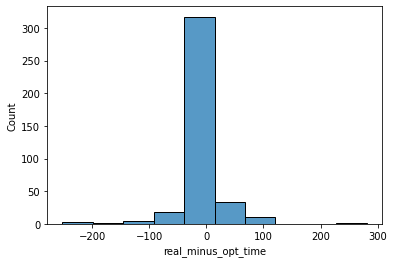

In [7]:
sns.histplot(x=optimal_real_target1['real_minus_opt_time'])

In [8]:
optimal_real_target1.describe()

,SubjectID,time_opt,status_opt,time_real,status_real,real_minus_opt_time
count,389.000000,389.000000,389.0,389.000000,389.0,389.000000
mean,487552.807198,250.778920,1.0,249.526992,1.0,-1.251928
std,299468.897964,93.714677,0.0,96.104820,0.0,39.326197
min,533.000000,95.000000,1.0,94.000000,1.0,-252.000000
25%,235461.000000,182.000000,1.0,176.000000,1.0,0.000000
50%,465936.000000,249.000000,1.0,252.000000,1.0,0.000000
75%,744381.000000,310.000000,1.0,310.000000,1.0,0.000000
max,996711.000000,505.000000,1.0,530.000000,1.0,281.000000


In [9]:
optimal_real_target1['real_minus_opt_time'].value_counts()

 0     302
-63      4
 63      4
-28      4
 28      4
      ... 
-77      1
-71      1
-66      1
-65      1
-59      1
Name: real_minus_opt_time, Length: 64, dtype: int64

In [10]:
subject_early = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] < 0]
subject_medium = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] == 0]
subject_late = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] > 0]
early_list = list(subject_early['SubjectID'])
medium_list = list(subject_medium['SubjectID'])
late_list = list(subject_late['SubjectID'])
print(len(early_list))
print(len(medium_list))
print(len(late_list))

42
302
45


In [11]:
optimal_real_target2 = optimal_real_target[(optimal_real_target['status_opt'] == 1) & (optimal_real_target['status_real'] == 0)]
add_late_list = list(optimal_real_target2['SubjectID'])

optimal_real_target3 = optimal_real_target[(optimal_real_target['status_opt'] == 0) & (optimal_real_target['status_real'] == 1)]
add_early_list = list(optimal_real_target3['SubjectID'])

print(len(add_late_list))
print(len(add_early_list))

45
46


In [12]:
validate_add_late = optimal_real_target2[['SubjectID','time_opt', 'time_real']]
validate_add_late['real(0)-optimal(1)'] = validate_add_late['time_real'] - validate_add_late['time_opt']
validate_add_late = validate_add_late[validate_add_late['real(0)-optimal(1)']<0]
validate_add_late

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_opt,time_real,real(0)-optimal(1)


In [13]:
validate_add_early = optimal_real_target3[['SubjectID','time_opt', 'time_real']]
validate_add_early['optimal(0)-real(1)'] = validate_add_early['time_opt'] - validate_add_early['time_real']
validate_add_early = validate_add_early[validate_add_early['optimal(0)-real(1)']<0]
validate_add_early

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_opt,time_real,optimal(0)-real(1)


In [14]:
early_list_fin = early_list + add_early_list
medium_list_fin = medium_list
late_list_fin = early_list + add_late_list
print(len(early_list_fin))
print(len(medium_list_fin))
print(len(late_list_fin))

88
302
87


In [15]:
!pip install lifelines

     |████████████████████████████████| 348kB 3.8MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=3246b9c973a4bfb410d1b99c44faf60de33534747defab23a3665682b96f5c43
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


##Kaplan Meier - Comparing early and late

In [16]:
from lifelines import KaplanMeierFitter

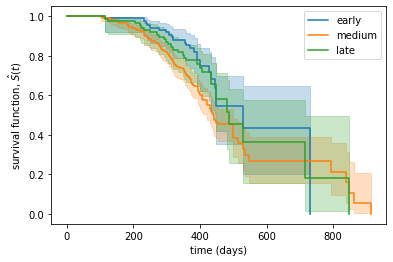

In [17]:
surv_early = survival.copy()
surv_medium = survival.copy()
surv_late = survival.copy()

surv_early.query("SubjectID == {0}".format(early_list_fin), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list_fin), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list_fin), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [18]:
from lifelines.statistics import logrank_test
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.5985122845754816

## Cox regression - effect of delayed gastrostomy

###Preprocessing data

In [19]:
feature_surv = pd.merge(feature, survival, on = 'SubjectID')
feature_surv = feature_surv.drop(columns='Unnamed: 0')
feature_surv

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.000000,3.000000,4.000000,3.000000,1.900000,3.000000,2.600000,2.000000,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.418109,97.421687,30.250000,4.000000,4.000000,4.000000,3.500000,2.000000,2.250000,3.500000,2.000000,1.000000,4.000000,8.000000,14.250000,-0.016393,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0
2,533.0,65.0,0.0,-44.0,-1023.0,1.0,979.0,-0.583333,73.500000,28.666667,1.000000,1.333333,2.000000,4.000000,4.000000,3.333333,4.000000,3.333333,2.666667,3.000000,3.000000,21.333333,-0.010989,-0.010989,-0.010989,0.000000,0.000000,0.000000,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989,378,0
3,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.000000,2.833333,2.666667,3.166667,3.750000,3.166667,4.000000,4.000000,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,250,1
4,902.0,77.0,0.0,-49.0,-514.0,0.0,465.0,-0.041707,89.600000,32.250000,4.000000,3.750000,3.250000,4.000000,4.000000,2.750000,4.000000,2.500000,1.000000,3.000000,7.250000,18.250000,-0.035714,0.000000,0.000000,0.011905,0.000000,0.000000,-0.023810,0.023810,-0.011905,0.000000,-0.011905,0.011905,-0.035714,154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,999761.0,62.0,1.0,-201.0,-717.0,0.0,516.0,-0.276491,70.168332,28.728766,3.269068,3.204172,3.363836,2.913782,2.626244,2.396330,2.952348,2.611772,1.842263,3.593018,6.628258,15.378400,-0.065272,0.023548,-0.045048,0.046242,-0.034908,-0.036826,-0.023184,0.007134,0.003107,0.002035,0.033081,0.069433,-0.123884,707,0
4042,999823.0,55.0,1.0,-84.0,-492.0,0.0,408.0,-0.025981,100.800000,35.250000,2.750000,3.000000,2.750000,4.000000,3.750000,3.000000,4.000000,4.000000,4.000000,4.000000,5.500000,22.750000,-0.024390,-0.012195,0.000000,-0.012195,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,-0.024390,0.000000,184,0
4043,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,4.000000,4.000000,4.000000,2.000000,1.000000,0.400000,2.800000,2.000000,0.000000,4.000000,8.000000,8.200000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266,0
4044,999929.0,56.0,1.0,-107.0,-411.0,0.0,304.0,0.288855,65.740601,28.811225,3.057780,3.227749,3.522808,2.987901,2.562066,2.399382,2.975168,2.625112,1.833925,3.589713,6.587373,15.357077,-0.019082,-0.004429,-0.003651,-0.000554,0.002776,-0.008762,0.007679,-0.023168,-0.006188,-0.015027,-0.004572,-0.005919,-0.004478,168,0


In [20]:
feature_surv_early = feature_surv.copy()
feature_surv_early.query("SubjectID == {0}".format(early_list_fin), inplace=True)
feature_surv_early['delayed_gas'] = 0 
feature_surv_early

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
24,7750.0,71.0,1.0,-135.0,-445.0,0.0,310.0,-0.085392,69.666667,31.50,4.00,4.0,4.00,3.000000,3.000000,2.000000,3.500000,2.50,2.00,3.50,8.00,16.00,-0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033898,-0.016949,0.000000,-0.016949,0.000000,0.000000,385,0,0
27,8150.0,57.0,1.0,-385.0,-538.0,0.0,153.0,-0.002933,84.200000,18.50,2.75,3.0,3.25,0.750000,0.500000,0.000000,2.250000,2.00,0.00,4.00,6.00,5.50,-0.024691,0.000000,0.000000,0.000000,-0.012346,-0.012346,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,-0.024691,416,0,0
48,12808.0,55.0,0.0,-59.0,-245.0,0.0,186.0,-0.071749,92.333333,26.25,3.25,4.0,3.00,3.250000,1.500000,2.000000,2.250000,2.25,1.50,3.25,6.25,12.75,-0.122222,-0.011111,0.000000,-0.022222,-0.011111,-0.022222,-0.022222,0.000000,-0.011111,-0.011111,0.011111,-0.033333,-0.100000,396,0,0
102,23939.0,56.0,0.0,-327.0,-653.0,0.0,326.0,0.077446,110.308090,27.25,3.75,4.0,4.00,3.000000,1.250000,2.250000,3.000000,2.00,0.00,4.00,7.75,11.50,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,-0.012821,0.012821,0.000000,0.000000,0.000000,0.012821,-0.012821,390,1,0
106,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.25,3.50,4.0,4.00,2.750000,1.500000,1.500000,1.750000,2.00,2.25,4.00,7.50,11.75,-0.054795,-0.013699,0.000000,0.000000,-0.013699,-0.013699,-0.013699,0.000000,0.000000,0.013699,0.000000,-0.013699,-0.041096,470,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,958971.0,74.0,1.0,-83.0,-284.0,1.0,201.0,0.149745,96.634694,28.50,3.25,4.0,3.00,1.250000,1.500000,2.250000,3.500000,3.50,2.25,4.00,6.25,14.25,-0.118421,-0.013158,0.000000,-0.026316,-0.013158,-0.013158,-0.013158,0.013158,-0.013158,-0.013158,0.000000,-0.039474,-0.078947,278,1,0
3861,960100.0,47.0,1.0,-37.0,-237.0,1.0,200.0,0.064925,103.333333,31.50,3.00,3.5,3.00,4.000000,4.000000,2.500000,4.000000,2.50,1.00,4.00,6.00,18.00,-0.050000,0.000000,-0.016667,0.000000,0.000000,0.000000,-0.016667,0.033333,-0.016667,0.000000,0.000000,0.000000,-0.033333,361,0,0
3890,965731.0,57.0,1.0,-56.0,-264.0,0.0,208.0,-0.322034,66.500000,24.50,4.00,4.0,4.00,2.500000,2.500000,1.500000,1.000000,1.50,0.00,3.50,8.00,9.00,-0.118644,0.000000,0.000000,0.000000,-0.016949,-0.016949,-0.016949,-0.016949,-0.016949,0.000000,-0.016949,0.000000,-0.101695,356,1,0
3961,981681.0,54.0,0.0,-435.0,-496.0,0.0,61.0,0.078798,77.000000,25.00,3.00,3.0,3.00,1.333333,2.333333,2.666667,2.666667,2.00,1.00,4.00,6.00,12.00,0.000000,0.000000,0.000000,0.000000,0.037736,-0.018868,-0.018868,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,730,1,0


In [21]:
feature_surv_late = feature_surv.copy()
feature_surv_late.query("SubjectID == {0}".format(late_list_fin), inplace=True)
feature_surv_late['delayed_gas'] = 1
feature_surv_late

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
48,12808.0,55.0,0.0,-59.0,-245.0,0.0,186.0,-0.071749,92.333333,26.250000,3.250000,4.000000,3.000000,3.250000,1.500000,2.000000,2.250000,2.25,1.500000,3.250000,6.250000,12.750000,-0.122222,-0.011111,0.000000,-0.022222,-0.011111,-0.022222,-0.022222,0.000000,-0.011111,-0.011111,0.011111,-0.033333,-0.100000,396,0,1
62,14836.0,59.0,1.0,-113.0,-297.0,0.0,184.0,-0.131329,77.666667,34.500000,4.000000,3.500000,4.000000,3.000000,3.000000,4.000000,4.000000,3.50,2.500000,3.000000,8.000000,20.000000,-0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035714,-0.035714,0.000000,0.000000,-0.071429,391,0,1
106,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.250000,3.500000,4.000000,4.000000,2.750000,1.500000,1.500000,1.750000,2.00,2.250000,4.000000,7.500000,11.750000,-0.054795,-0.013699,0.000000,0.000000,-0.013699,-0.013699,-0.013699,0.000000,0.000000,0.013699,0.000000,-0.013699,-0.041096,470,0,1
112,26082.0,52.0,0.0,-239.0,-331.0,0.0,92.0,-0.257285,59.250000,32.400000,3.800000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.00,0.600000,4.000000,7.800000,16.600000,-0.027778,-0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013889,0.000000,-0.013889,-0.013889,114,1,1
156,35064.0,75.0,0.0,-24.0,-339.0,0.0,315.0,0.026538,75.666667,29.000000,3.000000,2.333333,3.333333,2.666667,3.666667,2.000000,3.000000,3.00,2.333333,3.666667,6.333333,16.666667,-0.090909,0.000000,-0.045455,-0.015152,-0.015152,-0.015152,0.000000,0.015152,0.000000,0.000000,0.000000,-0.015152,-0.030303,232,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,969589.0,65.0,1.0,-672.0,-856.0,0.0,184.0,-0.045871,87.500000,28.250000,4.000000,3.500000,3.500000,4.000000,4.000000,1.500000,2.750000,1.00,0.000000,4.000000,7.500000,13.250000,-0.054945,0.000000,-0.010989,-0.021978,0.000000,0.000000,-0.010989,0.010989,0.000000,0.000000,0.000000,-0.021978,-0.021978,414,0,1
3921,972247.0,68.0,0.0,-469.0,-605.0,0.0,136.0,-0.169939,59.000000,21.100000,3.000000,2.700000,2.500000,3.000000,1.800000,1.600000,1.500000,2.00,0.000000,3.000000,5.500000,9.900000,-0.031746,0.000000,0.015873,-0.015873,0.000000,0.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,-0.015873,-0.031746,125,1,1
3931,974189.0,66.0,0.0,-50.0,-141.0,1.0,91.0,-0.321850,70.200000,29.000000,2.000000,2.750000,2.750000,2.750000,2.750000,2.750000,3.000000,3.75,3.750000,2.750000,4.750000,18.750000,-0.130952,0.000000,-0.023810,-0.011905,-0.011905,-0.011905,-0.011905,0.000000,-0.011905,-0.011905,-0.011905,-0.011905,-0.083333,286,0,1
3953,979982.0,78.0,0.0,-55.0,-406.0,1.0,351.0,-0.480208,54.675031,39.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000,7.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,430,0,1


In [22]:
X = pd.concat([feature_surv_early, feature_surv_late])
X

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
24,7750.0,71.0,1.0,-135.0,-445.0,0.0,310.0,-0.085392,69.666667,31.500000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.500000,2.50,2.000000,3.50,8.00,16.000000,-0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033898,-0.016949,0.000000,-0.016949,0.000000,0.000000,385,0,0
27,8150.0,57.0,1.0,-385.0,-538.0,0.0,153.0,-0.002933,84.200000,18.500000,2.750000,3.000000,3.250000,0.750000,0.500000,0.000000,2.250000,2.00,0.000000,4.00,6.00,5.500000,-0.024691,0.000000,0.000000,0.000000,-0.012346,-0.012346,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,-0.024691,416,0,0
48,12808.0,55.0,0.0,-59.0,-245.0,0.0,186.0,-0.071749,92.333333,26.250000,3.250000,4.000000,3.000000,3.250000,1.500000,2.000000,2.250000,2.25,1.500000,3.25,6.25,12.750000,-0.122222,-0.011111,0.000000,-0.022222,-0.011111,-0.022222,-0.022222,0.000000,-0.011111,-0.011111,0.011111,-0.033333,-0.100000,396,0,0
102,23939.0,56.0,0.0,-327.0,-653.0,0.0,326.0,0.077446,110.308090,27.250000,3.750000,4.000000,4.000000,3.000000,1.250000,2.250000,3.000000,2.00,0.000000,4.00,7.75,11.500000,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,-0.012821,0.012821,0.000000,0.000000,0.000000,0.012821,-0.012821,390,1,0
106,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.250000,3.500000,4.000000,4.000000,2.750000,1.500000,1.500000,1.750000,2.00,2.250000,4.00,7.50,11.750000,-0.054795,-0.013699,0.000000,0.000000,-0.013699,-0.013699,-0.013699,0.000000,0.000000,0.013699,0.000000,-0.013699,-0.041096,470,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,969589.0,65.0,1.0,-672.0,-856.0,0.0,184.0,-0.045871,87.500000,28.250000,4.000000,3.500000,3.500000,4.000000,4.000000,1.500000,2.750000,1.00,0.000000,4.00,7.50,13.250000,-0.054945,0.000000,-0.010989,-0.021978,0.000000,0.000000,-0.010989,0.010989,0.000000,0.000000,0.000000,-0.021978,-0.021978,414,0,1
3921,972247.0,68.0,0.0,-469.0,-605.0,0.0,136.0,-0.169939,59.000000,21.100000,3.000000,2.700000,2.500000,3.000000,1.800000,1.600000,1.500000,2.00,0.000000,3.00,5.50,9.900000,-0.031746,0.000000,0.015873,-0.015873,0.000000,0.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,-0.015873,-0.031746,125,1,1
3931,974189.0,66.0,0.0,-50.0,-141.0,1.0,91.0,-0.321850,70.200000,29.000000,2.000000,2.750000,2.750000,2.750000,2.750000,2.750000,3.000000,3.75,3.750000,2.75,4.75,18.750000,-0.130952,0.000000,-0.023810,-0.011905,-0.011905,-0.011905,-0.011905,0.000000,-0.011905,-0.011905,-0.011905,-0.011905,-0.083333,286,0,1
3953,979982.0,78.0,0.0,-55.0,-406.0,1.0,351.0,-0.480208,54.675031,39.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.00,7.00,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,430,0,1


In [23]:
X = X[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory','delayed_gas','time_event','status']]

In [24]:
from lifelines import CoxPHFitter

In [25]:
cph = CoxPHFitter(penalizer=0.01)
cph.fit(X, 'time_event', event_col='status')
cph.print_summary()

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q8_Walking'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 175 total observations, 120 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 175
number of events observed = 55
   partial log-likelihood = -198.10
         time fit was run = 2021-05-22 01:49:26 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.06       1.07       0.02             0.03             0.10                 1.03                 1.10
Gender                         -0.28       0.75       0.32            -0.92             0.35                 0.40                 1.42
onset_site                      0.02       1.02       0.58            -1.11             1.15                 0.33                 3.17
onset_delta                     0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diag_minus_onset               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -1.21       0.30       7.49           -15.88            13.47                 0.00             7.05e+05
fvc_slope                      -0.51       0.60       0.62            -1.72             0.71                 0.18                 2.02
fvc_mean                       -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
mean_Q10_Respiratory           -0.14       0.87       0.29            -0.71             0.43                 0.49                 1.54
mean_Bulbar                     0.35       1.42       0.16             0.04             0.66                 1.04                 1.94
mean_motor                     -0.10       0.91       0.03            -0.16            -0.03                 0.85                 0.97
slope_Q1_Speech                -5.10       0.01      16.02           -36.50            26.29                 0.00             2.61e+11
slope_Q2_Salivation             9.25   10363.41      18.08           -26.20            44.69                 0.00             2.56e+19
slope_Q3_Swallowing             1.02       2.77      12.40           -23.29            25.32                 0.00             9.91e+10
slope_Q4_Handwriting            3.03      20.69      13.55           -23.53            29.59                 0.00             7.09e+12
slope_Q5_Cutting              -12.03       0.00      14.82           -41.08            17.02                 0.00             2.46e+07
slope_Q6_Dressing_and_Hygiene  -6.51       0.00      14.14           -34.22            21.19                 0.00             1.60e+09
slope_Q7_Turning_in_Bed         9.29   10782.31       6.48            -3.42            21.99                 0.03             3.57e+09
slope_Q8_Walking              -42.08       0.00      21.37           -83.96            -0.21                 0.00                 0.81
slope_Q9_Climbing_Stairs       -5.37       0.00      13.66           -32.14            21.40                 0.00             1.97e+09
slope_Q10_Respiratory           8.14    3437.86      12.05           -15.47            31.75                 0.00             6.17e+13
delayed_gas                     0.26       1.30       0.31            -0.34             0.86                 0.71                 2.36

                                  z      p   -log2(p)
covariate                                            
Age                            4.03 <0.005      14.12
Gender                        -0.88   0.38       1.40
onset_site                     0.03   0.97       0.04
onset_delta                    0.74   0.46       1.12
diag_mi

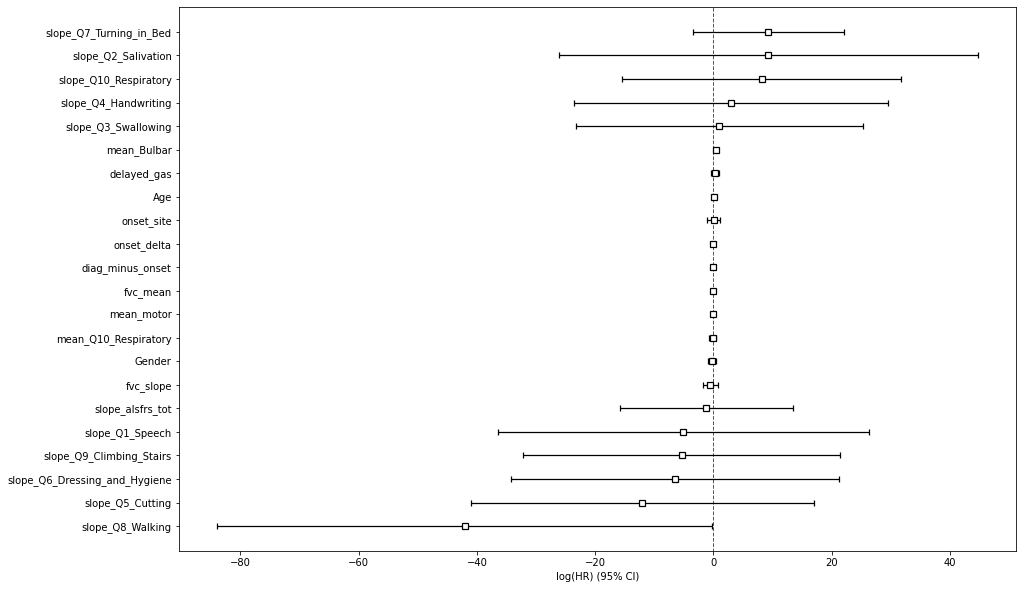

In [26]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함